#  Import Library

In [2]:
import TeraHertz_Dataset
import numpy as np
import pandas as pd
import keras.utils as utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [3]:
Input, Target = TeraHertz_Dataset.load_dataset()

In [4]:
print("Shape of Input: ", Input.shape)
print("Shape of Target: ", Target.shape)

Shape of Input:  (4200, 5074)
Shape of Target:  (4200,)


In [5]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
Input_Normalize = minmax_scale.fit_transform(Input)

In [6]:
Target_OneHot = utils.to_categorical(Target)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Input_Normalize, Target_OneHot, 
                                                    test_size=0.2, random_state=36)

In [8]:
print("Training Data: \n", " Feature Array: ", X_train.shape, "\n",
                           " Target: ", y_train.shape)
print("Testing Data: \n", " Feature Array: ", X_test.shape, "\n",
                           " Target: ", y_test.shape)

Training Data: 
  Feature Array:  (3360, 5074) 
  Target:  (3360, 2)
Testing Data: 
  Feature Array:  (840, 5074) 
  Target:  (840, 2)


In [9]:
sum(y_test)

array([ 396.,  444.])

# Create Model 

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [11]:
model = Sequential()

In [12]:
model.add(Dense(units=2048, input_dim=5074, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=1024, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=512, 
                kernel_initializer='uniform',
                activation='relu'))

In [15]:
model.add(Dense(units=256, 
                kernel_initializer='uniform',
                activation='relu'))

In [16]:
model.add(Dense(units=128, 
                kernel_initializer='uniform',
                activation='relu'))

In [17]:
model.add(Dense(2, activation='softmax'))

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              10393600  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 13,181,058
Trainable params: 13,181,058
Non-trainable params: 0
________________________________________________________________

# Train model

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(X_train, 
                         y_train, 
                         validation_split=0.1, 
                         epochs=100, 
                         batch_size=30,verbose=1)

Train on 3024 samples, validate on 336 samples
Epoch 1/100
3024/3024 [==============================] - 1s 413us/step - loss: 0.0373 - acc: 0.9854 - val_loss: 1.1138e-07 - val_acc: 1.0000
Epoch 2/100
3024/3024 [==============================] - 1s 241us/step - loss: 1.0961e-07 - acc: 1.0000 - val_loss: 1.1042e-07 - val_acc: 1.0000
Epoch 3/100
3024/3024 [==============================] - 1s 236us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 4/100
3024/3024 [==============================] - 1s 236us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 5/100
3024/3024 [==============================] - 1s 236us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 6/100
3024/3024 [==============================] - 1s 241us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 7/100
3024/3024 [==============================] - 1s 239us/step - loss: 1.0960e-

Epoch 57/100
3024/3024 [==============================] - 1s 241us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 58/100
3024/3024 [==============================] - 1s 240us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 59/100
3024/3024 [==============================] - 1s 241us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 60/100
3024/3024 [==============================] - 1s 237us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 61/100
3024/3024 [==============================] - 1s 243us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 62/100
3024/3024 [==============================] - 1s 240us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e-07 - val_acc: 1.0000
Epoch 63/100
3024/3024 [==============================] - 1s 233us/step - loss: 1.0960e-07 - acc: 1.0000 - val_loss: 1.1029e

# Print History

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

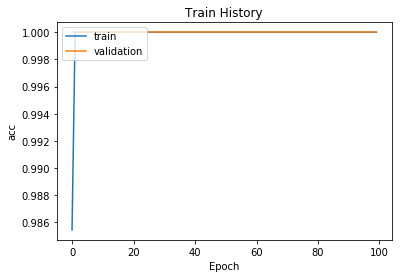

In [22]:
show_train_history(train_history,'acc','val_acc')

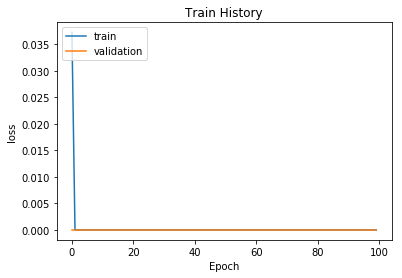

In [23]:
show_train_history(train_history,'loss','val_loss')

# Evaluation Accuracy

In [24]:
scores = model.evaluate(X_test, 
                        y_test)

840/840 [==============================] - 0s 38us/step


In [25]:
scores[1]

1.0

In [26]:
model.save('Keras_Terahertz_1061211.h5')